# Introduction

This assignment aims to provide a glimpse of the process of text preprocessing and the procedure of building a fully connected feedforward neural network to understand text.  We will also build another conventional supervised learning model for performance comparison. To obtain a relatively optimal model of neural networks, you need to tune hyperparameters associated the network. 

# Background

This assignment is based on Sentiment Analysis.  Sentiment analysis is one of the popular and highly useful applications in today's world, especially in the digital world. It is used in different fields, such as social media monitoring and market research. 


# Data 

To undertake these tasks, we will be using a data set – Cornell Sentence Polarity Dataset. 

This data was first introduced by Bo Pang and Lillian Lee in a research paper titled ‘Seeing stars: Exploiting class relationships for sentiment categorization with respect to rating scales.’ Published at ACL 2005. 

The starter notebook dataset contains 5331 positive and 5331 negative snippets of movie reviews. Authors assumed snippets (from Rotten Tomatoes webpages) for reviews marked with ‘fresh’ are positive, and those for reviews marked with ‘rotten’ are negative. 

# Problem Statement

You have to predict the sentiment of each review snippet, whether the review snippet is a positive or a negative one.


Specifically in this assignment, you are going to build two models: 
  - One conventional supervised learning model (non-neural network-based)
  - One deep learning based model

## How to use this Stub Notebook

- This notebook provides an overall structure to your assignment, and ensures that you are on the right track towards the end solution. You would find:

     - Each of the overall tasks for the assignment
     - A breakdown of the necessary steps to complete each task
     - Recommended approaches to solve each of the steps
     - Checklist to ensure that you're on the right track

- Note that there's no single correct approach to solve this assignment. Your approach would be evaluated fairly as long as the broad direction is correct, and you are able to achieve optimal results

## Task I - Represent each review using an N-gram model

For this task, you will perform the following steps:

- Data Loading
  - Import the necessary libraries
  - Load the dataset

- Use NLP techniques to preprocess the data set
    - Tokenization and Stopword removal
    - Stemming
    - Lemmatization
- Convert each document (i.e., a review) into a numeric vector using an N-gram model, in particular, the **Tf-Idf**

## Guidelines

To perform the above tasks and sub-tasks, perform the following steps:

- Load the necessary libraries and methods for this assignment
  - Loading and working with data sets - *pandas* and *NumPy*
  - Visualizing data - *pyplot* (from *matplotlib*) and *seaborn*
  - NLP techniques - To perform the text processing techniques use `nltk`. Also, download the necessary methods and corpuses from `nltk` for performing the steps such as  
    - Tokenization
    - Stop word removal
    - Stemming and Lemmatization
  -  Processing data:
    - *LabelEncoder* (from *sklearn.preprocessing*)
    - *train_test_split* (from *sklearn.model_selection*)
  - Conventional Machine Learning Models: Load the necessary packages for creating and evaluating the conventional machine learning models such as 
    - Logistic Regression
    - Decision Tree
    - Random Forests
    - kNN

  - Deep Learning Models: Import the necessary packages and methods for creating deep learning models
    - *tensorflow*
    - *keras*
    - all the necessary submodules and methods from the above to train and evaluate neural networks modules
  - Suppressing warnings
    

In [1]:
# Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Importing libraries for NLP techniques to pre-process data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from scipy.sparse import coo_matrix

# Importing packages for building conventional supervised learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier 

# Import methods for building neural networks
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

# Import 'KerasClassifier' from 'keras' for connecting neural networks with 'sklearn' and 'GridSearchCV'
from keras.wrappers.scikit_learn import KerasClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Write code to suppress warnings
import warnings
warnings.filterwarnings("ignore")

 - Load the dataset and check a few reviews
     - If you're using your local machine, make sure that the data set is in the right folder
     - If you're using Google colab you can simply the upload the csv file containing the data to your Google Drive and mount your Google Drive in your Colab VM to access the data.

In [3]:
# Write code to read the dataset
df = pd.read_csv('reviewsdata.csv')

In [4]:
# Check the 5 rows
df.head(5)

,Review,Label
0,the rock is destined to be the 21st century's ...,pos
1,"the gorgeously elaborate continuation of "" the...",pos
2,effective but too-tepid biopic,pos
3,if you sometimes like to go to the movies to h...,pos
4,"emerges as something rare , an issue movie tha...",pos


In [5]:
# shape
df.shape

(10662, 2)

### Tokenization and Stopwords removal

---

 - Initialize the tokenizer that you'll use. Note: This will impact your overall model building process.
 - Load the stop words from the nltk stopwords corpus and store it in a list *stopword_list*
 - Write a function `remove_stopwords` that takes a piece of text, tokenizes it and removes all the stopwords using the *stopword_list*
  - Input: a piece of text (`str`)
  - Output: the same piece of text, tokenized and with the stopwords removed.
 - Apply the function on a few rows from the data set and observe the results



In [6]:
# Load the tokenizer. You can try out a few methods from the nltk.tokenize module and see which one performs best
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
# Setting English stopwords
stopword_list = nltk.corpus.stopwords.words("english")

In [7]:
# Define a function "remove_stopwords" that takes a piece of text as input and outputs the tokenized version along with the stopwords removed.
# You should use the tokenizer and "stopword_list" that you created in the previous code cells for developing this function
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopword_list] for doc in texts]

In [8]:
# Removing the stopwords
data = df.Review.values.tolist()

# Apply function on review column
data_words = remove_stopwords(data)
print(data_words[0])
print(data_words[2])

['rock', 'destined', 'st', 'century', 'new', 'conan', 'going', 'make', 'splash', 'even', 'greater', 'arnold', 'schwarzenegger', 'jean', 'claud', 'van', 'damme', 'steven', 'segal']
['effective', 'tepid', 'biopic']


**Checklist**:

Check whether the function `remove_stopwords` is working as intended.
- Is it tokenizing the review snippet correctly?
- Are the unnecessary characters and stopwords removed?

Before applying the function on the entire data set, see if you can improve the tokenizer and/or your stopword list further.

**References**:

In case your tokenizer isn't performing satisfactorily, or if you're getting errors,  You can check out the following links for your reference
  - You can use `toktok Tokenizer` [Here's a link](https://www.nltk.org/api/nltk.tokenize.toktok.html) for your reference.
  - You might have to download `punkt` module in case you are getting errors. [Here's a link](https://www.nltk.org/api/nltk.tokenize.punkt.html) for your reference

**Next Steps**:

Once you're done with the verification and improvisation, the next step is to apply the `remove_stopwords` on the entire data.

In [9]:
# Apply "remove_stopwords" on all the reviews in the dataset

### Stemming

- Initialize the stemmer that you're going to use. We recommend using `PorterStemmer` from `nltk.porter` module
- Create a function `simple_stemmer` that takes a given piece of text and outputs the stemmed version of the individual words using the stemmer initialized earlier
    - Input: a piece of text (`str`)
    - Output: stemmed version of the text

In [10]:
# Initialize the stemmer

porter = nltk.PorterStemmer()

In [11]:
# Define "simple_stemmer"
def simple_stemmer(lists):
    return [[porter.stem(word) for word in x] for x in lists]
# Apply function on a few reviews
sample_stemmer = simple_stemmer(data_words[:10])

Checklist and Next Steps:

- Check if the `simple_stemmer` function is working as intended. Once verified, go ahead and apply it on the entire reviews column.

In [12]:
# Apply "simple_stemmer" on all the reviews in the dataset
data_stemmed = simple_stemmer(data_words)

### Lemmatization

- Initialize the Lemmatized that you're going to use. We recommend using 'WordNetLemmatizer'
- Create a function `simple_lemmatize` that takes a given piece of text and outputs the lemmatizedd version of the individual words using the lemmatizer initialized earlier
    - Input: a piece of text (`str`)
    - Output: lemmatized version of the text

In [13]:
#Initialize the lemmatizer
wnl = nltk.WordNetLemmatizer()

In [14]:
# Define "simple_lemmatize"    
def simple_lammatize(lists):
    return [[wnl.lemmatize(word) for word in x] for x in lists]

In [15]:
# Apply the function on a few reviews
sample_lammatize = simple_lammatize(data_words[:10])

Checklist and Next Steps:

- Check if the `simple_lemmatize` function is working as intended. Once verified, go ahead and apply it on the entire reviews column.

In [16]:
# Apply "simple_lemmatize" on all the reviews in the dataset
data_lammatized = simple_lammatize(data_words)

In [17]:
# Review the dataset after using NLP techniques to pre-process it
print(data_stemmed[:5])
print()
print(data_lammatized[:5])

[['rock', 'destin', 'st', 'centuri', 'new', 'conan', 'go', 'make', 'splash', 'even', 'greater', 'arnold', 'schwarzenegg', 'jean', 'claud', 'van', 'damm', 'steven', 'segal'], ['gorgeous', 'elabor', 'continu', 'lord', 'ring', 'trilog', 'huge', 'column', 'word', 'cannot', 'adequ', 'describ', 'co', 'writer', 'director', 'peter', 'jackson', 'expand', 'vision', 'tolkien', 'middl', 'earth'], ['effect', 'tepid', 'biopic'], ['sometim', 'like', 'go', 'movi', 'fun', 'wasabi', 'good', 'place', 'start'], ['emerg', 'someth', 'rare', 'issu', 'movi', 'honest', 'keenli', 'observ', 'feel', 'like', 'one']]

[['rock', 'destined', 'st', 'century', 'new', 'conan', 'going', 'make', 'splash', 'even', 'greater', 'arnold', 'schwarzenegger', 'jean', 'claud', 'van', 'damme', 'steven', 'segal'], ['gorgeously', 'elaborate', 'continuation', 'lord', 'ring', 'trilogy', 'huge', 'column', 'word', 'cannot', 'adequately', 'describe', 'co', 'writer', 'director', 'peter', 'jackson', 'expanded', 'vision', 'tolkien', 'middle'

### Tf-Idf Data Preparation

#### Guidelines

- Perform a train_test split of the reviews data. You can choose a split of your choice, along with any random state.
- Use the `TfidfVectorizer` object to create a n-gram model for both the train and validation reviews
- For this assignment, we recommend using max_features as `500`, though you can tweak the parameters to creat your final data set
- Also, ngram_range should be set to (1,2) 
- After `TfidfVectorizer` method has been initialized, use it to fit and transform the train data. Use the same tf-idf model to transform the validation data as well.
- Check the final shape of train and validation sets

In [18]:
#encoding labels and creating a new dataframe

labels = df['Label'].replace({'pos': 1, 'neg': 0})
review_data = pd.DataFrame({'reviews' : data_lammatized, 'labels' : labels})
review_data.head()

,reviews,labels
0,"[rock, destined, st, century, new, conan, goin...",1
1,"[gorgeously, elaborate, continuation, lord, ri...",1
2,"[effective, tepid, biopic]",1
3,"[sometimes, like, go, movie, fun, wasabi, good...",1
4,"[emerges, something, rare, issue, movie, hones...",1


In [19]:
# Perform a train-test split of the reviews data

X_train, X_test, y_train, y_test = train_test_split(review_data['reviews'], review_data['labels'], test_size=0.2, random_state=1)

In [20]:
# converting inputs into strings
X_train_strings = [' '.join(tokens) for tokens in X_train]
X_test_strings = [' '.join(tokens) for tokens in X_test]

In [21]:
# Create a TfidfVectorizer object and use it to fit and transform the train set
tfidf_vectorizer = TfidfVectorizer(max_features = 500, stop_words = 'english', use_idf = True, ngram_range = (1, 2))

Tfidf_train = tfidf_vectorizer.fit_transform(X_train_strings).toarray()

In [22]:
# Using the same model, transform the validation set
Tfidf_test = tfidf_vectorizer.fit_transform(X_test_strings).toarray()

In [23]:
# Check the shape of the train and validation sets
print('Tfidf_train :', Tfidf_train.shape)
print('Tfidf_test :', Tfidf_test.shape)

Tfidf_train : (8529, 500)
Tfidf_test : (2133, 500)


### Label Encoding sentiments

#### Guidelines
- As you might have seen in the dataset, the sentiments are encoded as 'pos' and 'neg'
- We need to convert these to 1 and 0 respectively.

In [24]:
# Split the target variable to train and validation sets

# Using LabelEncoder, convert 'pos' and 'neg' classes to '1' and '0' in the training data set output

# Using LabelEncoder, convert 'pos' and 'neg' classes to '1' and '0' in the validation  data set output
print(y_train)
print()
print(y_test)

6690    0
5284    1
4645    1
3597    1
3821    1
       ..
2895    1
7813    0
905     1
5192    1
235     1
Name: labels, Length: 8529, dtype: int64

7895    0
6722    0
1305    1
4543    1
1185    1
       ..
2770    1
4488    1
1145    1
7667    0
9868    0
Name: labels, Length: 2133, dtype: int64


# Task II - Build a conventional supervised machine learning model

## Guidelines

**Note** : The minimum requirement here is to build at least one conventional machine learning model. Though we recommend you try out multiple ML models and see which one is performing the best.

Here's our suggested approach:

 - Train different classification models on the training data set and test its performance
    - Logistic regression model
    - Decision tree model
    - kNN model
    - Random forest classifier model
    - Light gradient boosted tree classifier
 - Analyze the performance of all the models and select the one that performs with good accuracy and robustness
 - Perform hyperparameter tuning for the best model to further improve the model performance
 - Display the final model performance parameters like accuracy, confusion matrix, ROC and AUC.

 ### References

 - We strongly urge you to check the code that you learned in the Machine Learning course (You can refer to the Model Selection session for an overview of multiple ML models quickly).
 - Here's a list of documentations for different ML models that you can build here:
  - [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 
  - [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
  - [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
  - [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
  - [LGBM ](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

In [25]:
# scaling the training and test data
scaler = StandardScaler()
Tfidf_train = scaler.fit_transform(Tfidf_train)
Tfidf_test = scaler.fit_transform(Tfidf_test)

In [26]:
# Defining RMSE
def rmse(y_train, y_pred):
    return np.sqrt(mean_squared_error(y_train, y_pred))

In [27]:
# logictic regression model

lr_best_model = LogisticRegression(penalty='none', solver='lbfgs', random_state=0,  max_iter=200)
lr_best_model.fit(Tfidf_train, y_train)

# Evaluate the best model on the testing set
accuracy_lr = lr_best_model.score(Tfidf_test, y_test)
print("Accuracy of the best model on the testing set:", accuracy_lr)

# Calculating rmse value
lr_train_rmse = rmse(y_train, lr_best_model.predict(Tfidf_train))
lr_val_rmse = rmse(y_test, lr_best_model.predict(Tfidf_test))

Accuracy of the best model on the testing set: 0.5260196905766527


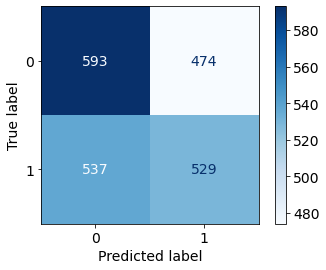

In [28]:
# plotting confusing matrix
plt.rcParams.update({'font.size': 14}) # To make the plot labels easier to read

# Plot the confusion matrix for the logistic regression model
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr_best_model, Tfidf_test, y_test, cmap = plt.cm.Blues);

In [29]:
# decision tree regressor
tree_best = DecisionTreeClassifier(random_state = 0, max_depth = 50)
tree_best.fit(Tfidf_train, y_train)

# calculating rmse values
tree_train_rmse = rmse(y_train, tree_best.predict(Tfidf_train))
tree_test_rmse = rmse(y_test, tree_best.predict(Tfidf_test))

The maximum accuracy is obtained at k = 1


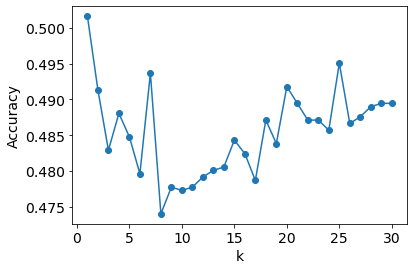

In [30]:
# knn model

kvalues = np.arange(1,31) # Parameter range

test_acc=[]

for k in kvalues:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(Tfidf_train, y_train)
    y_pred = knn_clf.predict(Tfidf_test)
    test_acc.append(accuracy_score(y_test, y_pred))

### Accuracy vs k
plt.plot(kvalues,test_acc,marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
print("The maximum accuracy is obtained at k = " + str(np.argmax(test_acc)+1))

In [31]:
knn_clf_best = KNeighborsClassifier(n_neighbors=1)
knn_clf_best.fit(Tfidf_train, y_train)

# Calculating rmse value
knn_train_rmse = rmse(y_train, knn_clf_best.predict(Tfidf_train))
knn_test_rmse = rmse(y_test, knn_clf_best.predict(Tfidf_test))

In [32]:
rf_best_model = RandomForestClassifier(class_weight = 'balanced', max_depth = 5, n_estimators = 200, random_state = 123)
rf_best_model.fit(Tfidf_train, y_train)

# Calculating rmse value
rf_train_rmse = rmse(y_train, rf_best_model.predict(Tfidf_train))
rf_test_rmse = rmse(y_test, rf_best_model.predict(Tfidf_test))

In [33]:
lgbm_model = LGBMClassifier(class_weight = 'balanced', max_depth = 5, n_estimators = 200, random_state = 123)
lgbm_model.fit(Tfidf_train, y_train)

# Calculating rmse value
lgbm_train_rmse = rmse(y_train, lgbm_model.predict(Tfidf_train))
lgbm_test_rmse = rmse(y_test, lgbm_model.predict(Tfidf_test))

In [34]:
# calculating error measures for different models
models = [lr_best_model, tree_best, knn_clf_best, rf_best_model, lgbm_model]
y_preds = [model.predict(Tfidf_test) for model in models]
accuracies = [accuracy_score(y_test, y_pred) for y_pred in y_preds]
f1_scores = [f1_score(y_test, y_pred) for y_pred in y_preds]
recall_values = [recall_score(y_test, y_pred) for y_pred in y_preds]

In [35]:
# creating dataframe for error measures

pd.DataFrame([accuracies, f1_scores, recall_values], columns=['Logistic', 'Tree', 'Knn', 'Rainforest', 'LGBM'], 
              index = ['Accuracies', 'F1 Scores', 'Recall Values'])

,Logistic,Tree,Knn,Rainforest,LGBM
Accuracies,0.526020,0.496953,0.501641,0.502110,0.488983
F1 Scores,0.511358,0.256410,0.460680,0.594037,0.418977
Recall Values,0.496248,0.173546,0.425891,0.728893,0.368668


In [36]:
# creating dataframe for rmse values
pd.DataFrame([[lr_train_rmse, lr_val_rmse],[tree_train_rmse, tree_test_rmse], 
            [knn_train_rmse, knn_test_rmse], [rf_train_rmse, rf_test_rmse], [lgbm_train_rmse, lgbm_test_rmse]],
            columns=['RMSE Train', 'RMSE Validation'], 
            index = ['Logistic', 'Tree', 'kNN', 'Rainforest', 'LGBM'])

,RMSE Train,RMSE Validation
Logistic,0.522335,0.688462
Tree,0.524240,0.709258
kNN,0.133058,0.705946
Rainforest,0.574908,0.705613
LGBM,0.524798,0.714855


ROC AUC train = 0.813
ROC AUC val = 0.499


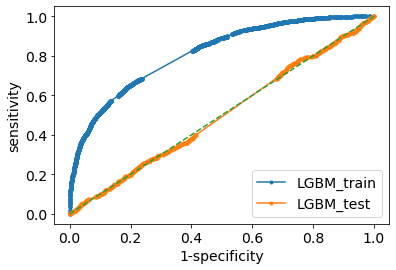

In [37]:
# creating ROC curve for Logistic model

# Predict probabilities for the training set
lgbm_probs_train = lgbm_model.predict_proba(Tfidf_train)

# Retain probabilities for only positive outcomes
lgbm_probs_train = lgbm_probs_train[:, 1]

# Predict probabilities for the validation set and retain them for only positive outcomes
lgbm_probs_test = lgbm_model.predict_proba(Tfidf_test)[:, 1]

# Calculate ROC AUC scores for training and validation predictions
lgbm_auc_train = roc_auc_score(y_train, lgbm_probs_train)
lgbm_auc_val = roc_auc_score(y_test, lgbm_probs_test)

# Print scores
print('ROC AUC train = %.3f' % (lgbm_auc_train))
print('ROC AUC val = %.3f' % (lgbm_auc_val))

# Calculate 1-specificity and sensitivity values for training and validation predictions
lgbm_1sp_train, lgbm_sen_train, _ = roc_curve(y_train, lgbm_probs_train)
lgbm_1sp_test, lgbm_sen_test, _ = roc_curve(y_test, lgbm_probs_test)

# Plot the ROC curve for the model
plt.plot(lgbm_1sp_train, lgbm_sen_train, marker = '.', label = 'LGBM_train')
plt.plot(lgbm_1sp_test, lgbm_sen_test, marker = '.', label = 'LGBM_test')
plt.plot([0,1], [0,1], linestyle = '--') # Baseline

# Set axis labels
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')

# Show the legend
plt.legend()

# Show the plot
plt.show()

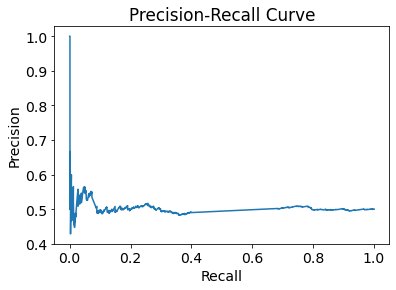

In [38]:
# Calculate precision and recall for the validation predictions
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, lgbm_probs_test)

# Create the precision-recall curve
plt.plot(recall,precision)

# Add axis labels to the plot
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')

# Show the plot
plt.show()

# Task III - Build a deep learning model

## Guidelines

For this task, you will perform the following steps:
  - Convert the data set stored in as a sparse matrix to a sparse tensor for the Keras model
    - A reference code is provided below
  - Create a simple fully-connected feedforward neural network
  - Fit the model on the training data set
  - Test the accuracy of the model on the validation data set
  - Show how the accuracy changes with every epoch during the training

#### Reference code for converting the sparse Tf-idf matrix to a sparse tensor

Converting the sparse matrix of a dataset obtained from Tf-Idf vectorization to a sparse tensor.This is done as Keras runs on Tensorflow backend and a Keras model accepts a sparse tensor as input, not a sparse matrix.

You can do the same easily using the `tf.SparseTensor` method([documentation](https://www.tensorflow.org/api_docs/python/tf/sparse/SparseTensor)) along with the `.tocoo()` method ([documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.tocoo.html))

The steps are as follows:

-  The .tocoo() method converts the tf-idf matrix to a coordinate format.
-  the tf.SparseTensor() method takes the output of the .tocoo() method and creates a SparseTensor

A sample code has been provided here

In [39]:
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)

After obtaining the sparse matrix from the above function, you have to do sparse reordering because tensorflow accepts input in row-major format. You can do the same using the `tf.sparse.reorder` method

You can check out its documentation [here](https://www.tensorflow.org/api_docs/python/tf/sparse/reorder)

In [40]:
## After converting the tf-idf data to a SparseTensor using the code snippet above, use the code below to do sparse reordering.
##tf.sparse.reorder(X)
## Here X is the sparse tensor output of the "convert_sparse_matrix_to_sparse_tensor" function

# For the training dataset
# Tfidf_train = coo_matrix(Tfidf_train).tocoo()

# For the validation dataset
# Tfidf_test = coo_matrix(Tfidf_test).tocoo()

---

## Building the Neural Network

Now that you saw how to convert the data to the correct format, it's time to implement it.



### Creating the sparse tensor input for both train and validation sets

In [41]:
# Converting sparse matrix to sparse tensor to submit as input to the Keras model
# Use the reference code that you learnt earlier
# Perform both the steps for train and validation sets

# For the training dataset
#Tfidf_train = convert_sparse_matrix_to_sparse_tensor(Tfidf_train)
#y_train = np.asarray(y_train)

# For the validation dataset
#Tfidf_test = convert_sparse_matrix_to_sparse_tensor(Tfidf_test)
#y_test = np.asarray(y_test)

### Define the neural network function

You can now go ahead and build the neural network. Here are a sample set of instructions that you may follow for this


- Start by defining a function called `create_nn` with two parameters: activation_function and hidden1_neurons.

- Inside the function, create a sparse input layer for a neural network using keras.Input(). Set the shape parameter to the correct value to indicate the input shape and `sparse=True` to specify that the input is a sparse tensor. Assign this input layer to a variable called `input`.

- Create the first hidden layer of the neural network using layers.Dense(). Set the units parameter to hidden1_neurons (which has a default value of 256) and the activation parameter to activation_function. Pass the input layer as the input to this hidden layer. Assign this hidden layer to a variable called hidden1.

- Create the second hidden layer of the neural network using layers.Dense(). Set the units parameter to 64 and the activation parameter to activation_function. Pass the hidden1 layer as the input to this hidden layer. Assign this hidden layer to a variable called hidden2.

- Create the output layer of the neural network using layers.Dense(). Set the units parameter to 1 (since it has only one node). Pass the hidden2 layer as the input to this output layer. Assign this output layer to a variable called output.

- Use keras.Model() to create the neural network model. Pass the input layer as the first argument and the output layer as the second argument. This function call will create and return the fully connected feedforward neural network.
Finally, add a return statement to return the created model.

*Remember to import the necessary libraries, such as tensorflow and keras, before running the code*







In [42]:
# Defining a fully-connected feedforward neural network
# You may write the code using the instructions shared above or follow your own approach
from tensorflow.keras import layers, models

def create_nn(activation_function = 'sigmoid', hidden1_neurons = 256):
    
    input_layer = keras.Input(shape = (500, ), sparse = True, name = 'tfidf_max_features')
    
    hidden1 = layers.Dense(hidden1_neurons, activation = activation_function)(input_layer)
    hidden2 = layers.Dense(units = 64, activation = activation_function)(hidden1)
    
    output_layer = layers.Dense(units = 1)(hidden2)
    
    model = models.Model(inputs=input_layer, outputs=output_layer)
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model

Build the FCFNN instance

- Create an instance of the fully connected feedforward neural network.
- Set the learning rate value to 0.01. This value will be used when compiling the neural network.
- Compile the neural network using the compile() method of nn1. 
- **Important** - Set the loss parameter to `'binary_crossentropy'`, since the output layer has only 1 node. 
- Set the metrics parameter to ['accuracy'] to track the accuracy during training. 
- For the optimizer parameter, create an instance of the RMSprop optimizer 
- Call the summary() method on the instance to print a summary of the neural network architecture.

*Remember to import the necessary libraries, such as tensorflow, keras, and RMSprop, before running the code.*

In [43]:
## Build the FCFNN instance using the instructions shared above or you can follow your own approach
nn1 = create_nn()

nn1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tfidf_max_features (InputLa  [(None, 500)]            0         
 yer)                                                            
                                                                 
 dense (Dense)               (None, 256)               128256    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 144,769
Trainable params: 144,769
Non-trainable params: 0
_________________________________________________________________


Build a simple FCFNN model

- Train the neural network model on the dataset using the fit() method of the FCFNN instance you built previously
- Pass the training data and the validation data
- Set the epochs parameter to 10 to specify the number of training epochs.
- The fit() method will return a history object that contains information about the training process. Assign this object to a variable

In [44]:
# Train the neural network model on the dataset
nn1_history = nn1.fit(Tfidf_train, y_train, validation_data=(Tfidf_test, y_test), epochs=10)

Epoch 1/10
267/267 [==============================] - 2s 5ms/step - loss: 0.9833 - accuracy: 0.6212 - val_loss: 1.2053 - val_accuracy: 0.4970
Epoch 2/10
267/267 [==============================] - 1s 3ms/step - loss: 0.7522 - accuracy: 0.6691 - val_loss: 0.8653 - val_accuracy: 0.5148
Epoch 3/10
267/267 [==============================] - 1s 2ms/step - loss: 0.6406 - accuracy: 0.6934 - val_loss: 1.8809 - val_accuracy: 0.4885
Epoch 4/10
267/267 [==============================] - 1s 2ms/step - loss: 0.6338 - accuracy: 0.7038 - val_loss: 1.5764 - val_accuracy: 0.5091
Epoch 5/10
267/267 [==============================] - 1s 4ms/step - loss: 0.6187 - accuracy: 0.7079 - val_loss: 1.4214 - val_accuracy: 0.5045
Epoch 6/10
267/267 [==============================] - 1s 4ms/step - loss: 0.5990 - accuracy: 0.7158 - val_loss: 1.6862 - val_accuracy: 0.5082
Epoch 7/10
267/267 [==============================] - 1s 4ms/step - loss: 0.5907 - accuracy: 0.7190 - val_loss: 1.2622 - val_accuracy: 0.5096
Epoch 

Convert Neural Network History to a DataFrame and Plot it
 
- Create a DataFrame containing the training history of the neural network.
- Add a new column to the DataFrame called 'epoch' that represents the epochs of the training process.
- After that plot the training and validation accuracies as functions of epoch



In [45]:
# Convert the neural network history object into a data frame to view its specifics
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,0.983332,0.621175,1.205318,0.496953
2,0.752198,0.669129,0.865322,0.514768
3,0.640571,0.693399,1.880929,0.488514
4,0.633838,0.703834,1.576373,0.509142
5,0.618698,0.707938,1.421442,0.504454
6,0.599040,0.715793,1.686196,0.508204
7,0.590728,0.718959,1.262161,0.509611
8,0.561360,0.730449,1.318211,0.509611
9,0.544133,0.737601,1.164844,0.505391


Text(0.5, 1.0, 'Accuracy as a function of Epoch')

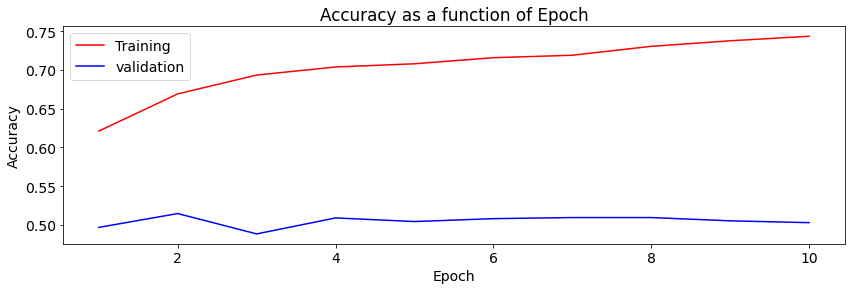

In [46]:
# View the training and validation accuracies as functions of epoch
plt.figure(figsize=(14,4))
sns.lineplot(data=hist, x='epoch', y='accuracy', color='red', label='Training')
sns.lineplot(data=hist, x='epoch', y='val_accuracy', color='blue', label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of Epoch')

Check the validation accuracy

In [47]:
# Compute the final accuracy of the model on the validation data set using the 'evaluate()' method
performance_test = nn1.evaluate(Tfidf_test, y_test)

print('The loss value of the model on the validation data is {}'.format(performance_test[0]))
print('The accuracy of the model on the validation data is {}'.format(performance_test[1]))

67/67 [==============================] - 0s 2ms/step - loss: 1.3278 - accuracy: 0.5030
The loss value of the model on the validation data is 1.3278199434280396
The accuracy of the model on the validation data is 0.5030473470687866


### Hyperparameter Tuning

Now that you have built a simple FCFNN model, it's time to optimize the model using hyperparameter tuning.

#### Guidelines
Here are a few guidelines on how to do the same:

- Choose multiple activation functions such as 'sigmoid' and 'relu'.

- Choose multiple values for hidden neurons such as 128 and 256.

- Create an empty DataFrame to store the performance results of the nn models that we plan to build

- Run a nested loop across all the different activation functions in activation_function_list, and over the number of neurons in hidden1_neurons_list. and create a neural network for each instance.

- Complie the model similar to how built the simple FCFNN model. Use the different parameters accordingly.

- Create a DataFrame with the relevant information (activation function, number of neurons, train accuracy, and validation accuracy) for the current model.

- Concatenate the same with the previous empty DataFrame that we created. After the nested loop finishes, the DataFrame will contain the performance results for each model.

In [48]:
## Perform hyperparameter tuning using the guidelines shared above
  
# Define the 'build_fn' parameter for KerasClassifier using your create_nn function
base_grid_model = KerasClassifier(build_fn=create_nn)

# Define the range of parameters
parameters_grid = {'activation_function': ['sigmoid', 'relu'], 'hidden1_neurons': [128, 256]}

# Perform grid search using GridSearchCV
grid = GridSearchCV(estimator=base_grid_model, param_grid=parameters_grid, cv=2, verbose=4)

# Instead of directly using nn, pass the create_nn function to KerasClassifier
grid_model = grid.fit(Tfidf_train, y_train, batch_size=Tfidf_train.shape[0], epochs=200)

# Print the optimal values of parameters
best_activation = grid_model.best_params_['activation_function']
best_n_neurons = grid_model.best_params_['hidden1_neurons']

print('The optimal activation function is', best_activation)
print('The optimal number of neurons per hidden layer is', best_n_neurons)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Epoch 1/200
1/1 [==============================] - 0s 367ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 2/200
1/1 [==============================] - 0s 23ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 3/200
1/1 [==============================] - 0s 21ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 4/200
1/1 [==============================] - 0s 22ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 5/200
1/1 [==============================] - 0s 21ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 6/200
1/1 [==============================] - 0s 23ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 7/200
1/1 [==============================] - 0s 24ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 8/200
1/1 [==============================] - 0s 21ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 9/200
1/1 [==============================] - 0s 21ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 10/200
1/1 [==============================] - 0s 20m

1/1 [==============================] - 0s 22ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 84/200
1/1 [==============================] - 0s 22ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 85/200
1/1 [==============================] - 0s 22ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 86/200
1/1 [==============================] - 0s 19ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 87/200
1/1 [==============================] - 0s 21ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 88/200
1/1 [==============================] - 0s 19ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 89/200
1/1 [==============================] - 0s 18ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 90/200
1/1 [==============================] - 0s 19ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 91/200
1/1 [==============================] - 0s 19ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 92/200
1/1 [==============================] - 0s 19ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 93/200
1/1 [=====

1/1 [==============================] - 0s 22ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 166/200
1/1 [==============================] - 0s 22ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 167/200
1/1 [==============================] - 0s 20ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 168/200
1/1 [==============================] - 0s 20ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 169/200
1/1 [==============================] - 0s 21ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 170/200
1/1 [==============================] - 0s 21ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 171/200
1/1 [==============================] - 0s 20ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 172/200
1/1 [==============================] - 0s 19ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 173/200
1/1 [==============================] - 0s 20ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 174/200
1/1 [==============================] - 0s 21ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 175/200


1/1 [==============================] - 0s 19ms/step - loss: 0.5217 - accuracy: 0.7325
Epoch 46/200
1/1 [==============================] - 0s 20ms/step - loss: 0.5191 - accuracy: 0.7343
Epoch 47/200
1/1 [==============================] - 0s 18ms/step - loss: 0.5166 - accuracy: 0.7341
Epoch 48/200
1/1 [==============================] - 0s 18ms/step - loss: 0.5141 - accuracy: 0.7346
Epoch 49/200
1/1 [==============================] - 0s 18ms/step - loss: 0.5118 - accuracy: 0.7367
Epoch 50/200
1/1 [==============================] - 0s 19ms/step - loss: 0.5095 - accuracy: 0.7369
Epoch 51/200
1/1 [==============================] - 0s 22ms/step - loss: 0.5074 - accuracy: 0.7376
Epoch 52/200
1/1 [==============================] - 0s 20ms/step - loss: 0.5054 - accuracy: 0.7383
Epoch 53/200
1/1 [==============================] - 0s 20ms/step - loss: 0.5038 - accuracy: 0.7383
Epoch 54/200
1/1 [==============================] - 0s 20ms/step - loss: 0.5051 - accuracy: 0.7261
Epoch 55/200
1/1 [=====

1/1 [==============================] - 0s 18ms/step - loss: 0.4424 - accuracy: 0.7655
Epoch 128/200
1/1 [==============================] - 0s 18ms/step - loss: 0.4416 - accuracy: 0.7660
Epoch 129/200
1/1 [==============================] - 0s 18ms/step - loss: 0.4408 - accuracy: 0.7660
Epoch 130/200
1/1 [==============================] - 0s 18ms/step - loss: 0.4400 - accuracy: 0.7655
Epoch 131/200
1/1 [==============================] - 0s 19ms/step - loss: 0.4392 - accuracy: 0.7655
Epoch 132/200
1/1 [==============================] - 0s 18ms/step - loss: 0.4384 - accuracy: 0.7662
Epoch 133/200
1/1 [==============================] - 0s 19ms/step - loss: 0.4376 - accuracy: 0.7660
Epoch 134/200
1/1 [==============================] - 0s 18ms/step - loss: 0.4367 - accuracy: 0.7665
Epoch 135/200
1/1 [==============================] - 0s 19ms/step - loss: 0.4359 - accuracy: 0.7660
Epoch 136/200
1/1 [==============================] - 0s 19ms/step - loss: 0.4351 - accuracy: 0.7679
Epoch 137/200


1/1 [==============================] - 0s 24ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 8/200
1/1 [==============================] - 0s 27ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 9/200
1/1 [==============================] - 0s 25ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 10/200
1/1 [==============================] - 0s 24ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 11/200
1/1 [==============================] - 0s 26ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 12/200
1/1 [==============================] - 0s 25ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 13/200
1/1 [==============================] - 0s 27ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 14/200
1/1 [==============================] - 0s 28ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 15/200
1/1 [==============================] - 0s 24ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 16/200
1/1 [==============================] - 0s 26ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 17/200
1/1 [=======

1/1 [==============================] - 0s 28ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 90/200
1/1 [==============================] - 0s 27ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 91/200
1/1 [==============================] - 0s 27ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 92/200
1/1 [==============================] - 0s 25ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 93/200
1/1 [==============================] - 0s 24ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 94/200
1/1 [==============================] - 0s 26ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 95/200
1/1 [==============================] - 0s 26ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 96/200
1/1 [==============================] - 0s 25ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 97/200
1/1 [==============================] - 0s 28ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 98/200
1/1 [==============================] - 0s 27ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 99/200
1/1 [=====

1/1 [==============================] - 0s 24ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 172/200
1/1 [==============================] - 0s 25ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 173/200
1/1 [==============================] - 0s 26ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 174/200
1/1 [==============================] - 0s 27ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 175/200
1/1 [==============================] - 0s 25ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 176/200
1/1 [==============================] - 0s 25ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 177/200
1/1 [==============================] - 0s 26ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 178/200
1/1 [==============================] - 0s 24ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 179/200
1/1 [==============================] - 0s 25ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 180/200
1/1 [==============================] - 0s 25ms/step - loss: 7.6039 - accuracy: 0.5070
Epoch 181/200


1/1 [==============================] - 0s 26ms/step - loss: 0.5063 - accuracy: 0.7449
Epoch 52/200
1/1 [==============================] - 0s 26ms/step - loss: 0.5052 - accuracy: 0.7458
Epoch 53/200
1/1 [==============================] - 0s 27ms/step - loss: 0.5041 - accuracy: 0.7472
Epoch 54/200
1/1 [==============================] - 0s 27ms/step - loss: 0.5031 - accuracy: 0.7479
Epoch 55/200
1/1 [==============================] - 0s 28ms/step - loss: 0.5021 - accuracy: 0.7475
Epoch 56/200
1/1 [==============================] - 0s 27ms/step - loss: 0.5012 - accuracy: 0.7489
Epoch 57/200
1/1 [==============================] - 0s 26ms/step - loss: 0.5002 - accuracy: 0.7489
Epoch 58/200
1/1 [==============================] - 0s 28ms/step - loss: 0.4993 - accuracy: 0.7491
Epoch 59/200
1/1 [==============================] - 0s 30ms/step - loss: 0.4984 - accuracy: 0.7496
Epoch 60/200
1/1 [==============================] - 0s 32ms/step - loss: 0.4975 - accuracy: 0.7498
Epoch 61/200
1/1 [=====

1/1 [==============================] - 0s 29ms/step - loss: 0.4616 - accuracy: 0.7655
Epoch 134/200
1/1 [==============================] - 0s 30ms/step - loss: 0.4610 - accuracy: 0.7669
Epoch 135/200
1/1 [==============================] - 0s 31ms/step - loss: 0.4605 - accuracy: 0.7674
Epoch 136/200
1/1 [==============================] - 0s 29ms/step - loss: 0.4599 - accuracy: 0.7674
Epoch 137/200
1/1 [==============================] - 0s 32ms/step - loss: 0.4594 - accuracy: 0.7681
Epoch 138/200
1/1 [==============================] - 0s 28ms/step - loss: 0.4588 - accuracy: 0.7686
Epoch 139/200
1/1 [==============================] - 0s 28ms/step - loss: 0.4583 - accuracy: 0.7688
Epoch 140/200
1/1 [==============================] - 0s 27ms/step - loss: 0.4577 - accuracy: 0.7683
Epoch 141/200
1/1 [==============================] - 0s 29ms/step - loss: 0.4571 - accuracy: 0.7679
Epoch 142/200
1/1 [==============================] - 0s 28ms/step - loss: 0.4566 - accuracy: 0.7686
Epoch 143/200


1/1 [==============================] - 0s 18ms/step - loss: 1.6769 - accuracy: 0.7439
Epoch 14/200
1/1 [==============================] - 0s 19ms/step - loss: 1.6021 - accuracy: 0.7530
Epoch 15/200
1/1 [==============================] - 0s 21ms/step - loss: 1.5341 - accuracy: 0.7538
Epoch 16/200
1/1 [==============================] - 0s 19ms/step - loss: 1.6896 - accuracy: 0.7080
Epoch 17/200
1/1 [==============================] - 0s 19ms/step - loss: 1.4584 - accuracy: 0.7812
Epoch 18/200
1/1 [==============================] - 0s 19ms/step - loss: 1.4180 - accuracy: 0.7920
Epoch 19/200
1/1 [==============================] - 0s 21ms/step - loss: 1.3913 - accuracy: 0.8014
Epoch 20/200
1/1 [==============================] - 0s 20ms/step - loss: 1.3032 - accuracy: 0.7995
Epoch 21/200
1/1 [==============================] - 0s 20ms/step - loss: 1.3902 - accuracy: 0.7509
Epoch 22/200
1/1 [==============================] - 0s 19ms/step - loss: 1.2279 - accuracy: 0.8147
Epoch 23/200
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.6410 - accuracy: 0.9179
Epoch 96/200
1/1 [==============================] - 0s 19ms/step - loss: 0.6089 - accuracy: 0.9287
Epoch 97/200
1/1 [==============================] - 0s 20ms/step - loss: 0.5849 - accuracy: 0.9303
Epoch 98/200
1/1 [==============================] - 0s 20ms/step - loss: 0.5774 - accuracy: 0.9334
Epoch 99/200
1/1 [==============================] - 0s 20ms/step - loss: 0.5752 - accuracy: 0.9336
Epoch 100/200
1/1 [==============================] - 0s 22ms/step - loss: 0.5739 - accuracy: 0.9343
Epoch 101/200
1/1 [==============================] - 0s 21ms/step - loss: 0.5730 - accuracy: 0.9346
Epoch 102/200
1/1 [==============================] - 0s 21ms/step - loss: 0.5723 - accuracy: 0.9343
Epoch 103/200
1/1 [==============================] - 0s 20ms/step - loss: 0.5718 - accuracy: 0.9343
Epoch 104/200
1/1 [==============================] - 0s 21ms/step - loss: 0.5711 - accuracy: 0.9346
Epoch 105/200
1/1 

1/1 [==============================] - 0s 22ms/step - loss: 0.4880 - accuracy: 0.9409
Epoch 178/200
1/1 [==============================] - 0s 20ms/step - loss: 0.4878 - accuracy: 0.9409
Epoch 179/200
1/1 [==============================] - 0s 20ms/step - loss: 0.4877 - accuracy: 0.9409
Epoch 180/200
1/1 [==============================] - 0s 22ms/step - loss: 0.4877 - accuracy: 0.9407
Epoch 181/200
1/1 [==============================] - 0s 20ms/step - loss: 0.4877 - accuracy: 0.9416
Epoch 182/200
1/1 [==============================] - 0s 20ms/step - loss: 0.4876 - accuracy: 0.9407
Epoch 183/200
1/1 [==============================] - 0s 20ms/step - loss: 0.4875 - accuracy: 0.9416
Epoch 184/200
1/1 [==============================] - 0s 21ms/step - loss: 0.4875 - accuracy: 0.9416
Epoch 185/200
1/1 [==============================] - 0s 20ms/step - loss: 0.4875 - accuracy: 0.9411
Epoch 186/200
1/1 [==============================] - 0s 21ms/step - loss: 0.4874 - accuracy: 0.9418
Epoch 187/200


1/1 [==============================] - 0s 23ms/step - loss: 0.5947 - accuracy: 0.9121
Epoch 58/200
1/1 [==============================] - 0s 22ms/step - loss: 0.5842 - accuracy: 0.9177
Epoch 59/200
1/1 [==============================] - 0s 22ms/step - loss: 0.5795 - accuracy: 0.9170
Epoch 60/200
1/1 [==============================] - 0s 21ms/step - loss: 0.5752 - accuracy: 0.9224
Epoch 61/200
1/1 [==============================] - 0s 21ms/step - loss: 0.5719 - accuracy: 0.9210
Epoch 62/200
1/1 [==============================] - 0s 20ms/step - loss: 0.5705 - accuracy: 0.9226
Epoch 63/200
1/1 [==============================] - 0s 21ms/step - loss: 0.5735 - accuracy: 0.9212
Epoch 64/200
1/1 [==============================] - 0s 22ms/step - loss: 0.5899 - accuracy: 0.9165
Epoch 65/200
1/1 [==============================] - 0s 21ms/step - loss: 0.6150 - accuracy: 0.9043
Epoch 66/200
1/1 [==============================] - 0s 31ms/step - loss: 0.7247 - accuracy: 0.8816
Epoch 67/200
1/1 [=====

1/1 [==============================] - 0s 21ms/step - loss: 0.4411 - accuracy: 0.9376
Epoch 140/200
1/1 [==============================] - 0s 19ms/step - loss: 0.4410 - accuracy: 0.9379
Epoch 141/200
1/1 [==============================] - 0s 21ms/step - loss: 0.4411 - accuracy: 0.9376
Epoch 142/200
1/1 [==============================] - 0s 20ms/step - loss: 0.4413 - accuracy: 0.9381
Epoch 143/200
1/1 [==============================] - 0s 21ms/step - loss: 0.4441 - accuracy: 0.9365
Epoch 144/200
1/1 [==============================] - 0s 22ms/step - loss: 0.4576 - accuracy: 0.9320
Epoch 145/200
1/1 [==============================] - 0s 20ms/step - loss: 0.8196 - accuracy: 0.8488
Epoch 146/200
1/1 [==============================] - 0s 21ms/step - loss: 0.4804 - accuracy: 0.9261
Epoch 147/200
1/1 [==============================] - 0s 24ms/step - loss: 0.4156 - accuracy: 0.9353
Epoch 148/200
1/1 [==============================] - 0s 24ms/step - loss: 0.4095 - accuracy: 0.9381
Epoch 149/200


1/1 [==============================] - 0s 28ms/step - loss: 1.4701 - accuracy: 0.7887
Epoch 20/200
1/1 [==============================] - 0s 32ms/step - loss: 1.4376 - accuracy: 0.7957
Epoch 21/200
1/1 [==============================] - 0s 30ms/step - loss: 1.4241 - accuracy: 0.7871
Epoch 22/200
1/1 [==============================] - 0s 31ms/step - loss: 1.3612 - accuracy: 0.8037
Epoch 23/200
1/1 [==============================] - 0s 31ms/step - loss: 1.3262 - accuracy: 0.8192
Epoch 24/200
1/1 [==============================] - 0s 32ms/step - loss: 1.3066 - accuracy: 0.8239
Epoch 25/200
1/1 [==============================] - 0s 31ms/step - loss: 1.2816 - accuracy: 0.8283
Epoch 26/200
1/1 [==============================] - 0s 26ms/step - loss: 1.2663 - accuracy: 0.8347
Epoch 27/200
1/1 [==============================] - 0s 30ms/step - loss: 1.2538 - accuracy: 0.8405
Epoch 28/200
1/1 [==============================] - 0s 28ms/step - loss: 1.2403 - accuracy: 0.8492
Epoch 29/200
1/1 [=====

1/1 [==============================] - 0s 26ms/step - loss: 0.4519 - accuracy: 0.9418
Epoch 102/200
1/1 [==============================] - 0s 27ms/step - loss: 0.4524 - accuracy: 0.9425
Epoch 103/200
1/1 [==============================] - 0s 26ms/step - loss: 0.4475 - accuracy: 0.9432
Epoch 104/200
1/1 [==============================] - 0s 25ms/step - loss: 0.4470 - accuracy: 0.9421
Epoch 105/200
1/1 [==============================] - 0s 26ms/step - loss: 0.4447 - accuracy: 0.9435
Epoch 106/200
1/1 [==============================] - 0s 26ms/step - loss: 0.4435 - accuracy: 0.9442
Epoch 107/200
1/1 [==============================] - 0s 24ms/step - loss: 0.4427 - accuracy: 0.9447
Epoch 108/200
1/1 [==============================] - 0s 28ms/step - loss: 0.4421 - accuracy: 0.9444
Epoch 109/200
1/1 [==============================] - 0s 29ms/step - loss: 0.4416 - accuracy: 0.9447
Epoch 110/200
1/1 [==============================] - 0s 25ms/step - loss: 0.4415 - accuracy: 0.9444
Epoch 111/200


1/1 [==============================] - 0s 25ms/step - loss: 0.2794 - accuracy: 0.9540
Epoch 184/200
1/1 [==============================] - 0s 26ms/step - loss: 0.2779 - accuracy: 0.9545
Epoch 185/200
1/1 [==============================] - 0s 26ms/step - loss: 0.2771 - accuracy: 0.9545
Epoch 186/200
1/1 [==============================] - 0s 28ms/step - loss: 0.2766 - accuracy: 0.9550
Epoch 187/200
1/1 [==============================] - 0s 25ms/step - loss: 0.2762 - accuracy: 0.9557
Epoch 188/200
1/1 [==============================] - 0s 26ms/step - loss: 0.2758 - accuracy: 0.9557
Epoch 189/200
1/1 [==============================] - 0s 27ms/step - loss: 0.2756 - accuracy: 0.9557
Epoch 190/200
1/1 [==============================] - 0s 27ms/step - loss: 0.2754 - accuracy: 0.9557
Epoch 191/200
1/1 [==============================] - 0s 25ms/step - loss: 0.2752 - accuracy: 0.9559
Epoch 192/200
1/1 [==============================] - 0s 28ms/step - loss: 0.2750 - accuracy: 0.9559
Epoch 193/200


Epoch 64/200
1/1 [==============================] - 0s 26ms/step - loss: 0.6048 - accuracy: 0.9097
Epoch 65/200
1/1 [==============================] - 0s 26ms/step - loss: 0.7082 - accuracy: 0.9013
Epoch 66/200
1/1 [==============================] - 0s 25ms/step - loss: 0.5669 - accuracy: 0.9154
Epoch 67/200
1/1 [==============================] - 0s 26ms/step - loss: 0.5260 - accuracy: 0.9215
Epoch 68/200
1/1 [==============================] - 0s 26ms/step - loss: 0.5061 - accuracy: 0.9250
Epoch 69/200
1/1 [==============================] - 0s 27ms/step - loss: 0.5043 - accuracy: 0.9268
Epoch 70/200
1/1 [==============================] - 0s 26ms/step - loss: 0.4978 - accuracy: 0.9285
Epoch 71/200
1/1 [==============================] - 0s 25ms/step - loss: 0.4949 - accuracy: 0.9294
Epoch 72/200
1/1 [==============================] - 0s 26ms/step - loss: 0.4927 - accuracy: 0.9306
Epoch 73/200
1/1 [==============================] - 0s 26ms/step - loss: 0.4908 - accuracy: 0.9313
Epoch 74/2

1/1 [==============================] - 0s 27ms/step - loss: 0.4320 - accuracy: 0.9397
Epoch 147/200
1/1 [==============================] - 0s 27ms/step - loss: 0.4320 - accuracy: 0.9397
Epoch 148/200
1/1 [==============================] - 0s 27ms/step - loss: 0.4320 - accuracy: 0.9395
Epoch 149/200
1/1 [==============================] - 0s 26ms/step - loss: 0.4321 - accuracy: 0.9397
Epoch 150/200
1/1 [==============================] - 0s 26ms/step - loss: 0.4296 - accuracy: 0.9395
Epoch 151/200
1/1 [==============================] - 0s 27ms/step - loss: 0.4281 - accuracy: 0.9397
Epoch 152/200
1/1 [==============================] - 0s 27ms/step - loss: 0.4279 - accuracy: 0.9397
Epoch 153/200
1/1 [==============================] - 0s 27ms/step - loss: 0.4279 - accuracy: 0.9402
Epoch 154/200
1/1 [==============================] - 0s 24ms/step - loss: 0.4279 - accuracy: 0.9397
Epoch 155/200
1/1 [==============================] - 0s 26ms/step - loss: 0.4279 - accuracy: 0.9400
Epoch 156/200


1/1 [==============================] - 0s 31ms/step - loss: 1.0662 - accuracy: 0.7907
Epoch 27/200
1/1 [==============================] - 0s 31ms/step - loss: 1.0548 - accuracy: 0.7968
Epoch 28/200
1/1 [==============================] - 0s 32ms/step - loss: 1.0345 - accuracy: 0.8019
Epoch 29/200
1/1 [==============================] - 0s 31ms/step - loss: 1.0177 - accuracy: 0.8072
Epoch 30/200
1/1 [==============================] - 0s 31ms/step - loss: 1.0086 - accuracy: 0.8133
Epoch 31/200
1/1 [==============================] - 0s 31ms/step - loss: 0.9995 - accuracy: 0.8178
Epoch 32/200
1/1 [==============================] - 0s 29ms/step - loss: 0.9625 - accuracy: 0.8051
Epoch 33/200
1/1 [==============================] - 0s 30ms/step - loss: 0.9243 - accuracy: 0.8233
Epoch 34/200
1/1 [==============================] - 0s 34ms/step - loss: 0.9032 - accuracy: 0.8316
Epoch 35/200
1/1 [==============================] - 0s 33ms/step - loss: 0.8899 - accuracy: 0.8369
Epoch 36/200
1/1 [=====

1/1 [==============================] - 0s 34ms/step - loss: 0.4224 - accuracy: 0.9265
Epoch 109/200
1/1 [==============================] - 0s 34ms/step - loss: 0.4193 - accuracy: 0.9251
Epoch 110/200
1/1 [==============================] - 0s 34ms/step - loss: 0.4118 - accuracy: 0.9288
Epoch 111/200
1/1 [==============================] - 0s 36ms/step - loss: 0.4029 - accuracy: 0.9308
Epoch 112/200
1/1 [==============================] - 0s 31ms/step - loss: 0.3971 - accuracy: 0.9332
Epoch 113/200
1/1 [==============================] - 0s 31ms/step - loss: 0.3945 - accuracy: 0.9339
Epoch 114/200
1/1 [==============================] - 0s 31ms/step - loss: 0.3925 - accuracy: 0.9346
Epoch 115/200
1/1 [==============================] - 0s 31ms/step - loss: 0.3913 - accuracy: 0.9345
Epoch 116/200
1/1 [==============================] - 0s 32ms/step - loss: 0.3912 - accuracy: 0.9347
Epoch 117/200
1/1 [==============================] - 0s 32ms/step - loss: 0.3946 - accuracy: 0.9340
Epoch 118/200


1/1 [==============================] - 0s 29ms/step - loss: 0.3025 - accuracy: 0.9428
Epoch 191/200
1/1 [==============================] - 0s 29ms/step - loss: 0.2969 - accuracy: 0.9443
Epoch 192/200
1/1 [==============================] - 0s 29ms/step - loss: 0.2954 - accuracy: 0.9445
Epoch 193/200
1/1 [==============================] - 0s 27ms/step - loss: 0.2945 - accuracy: 0.9445
Epoch 194/200
1/1 [==============================] - 0s 25ms/step - loss: 0.2939 - accuracy: 0.9448
Epoch 195/200
1/1 [==============================] - 0s 26ms/step - loss: 0.2934 - accuracy: 0.9451
Epoch 196/200
1/1 [==============================] - 0s 25ms/step - loss: 0.2930 - accuracy: 0.9451
Epoch 197/200
1/1 [==============================] - 0s 27ms/step - loss: 0.2927 - accuracy: 0.9452
Epoch 198/200
1/1 [==============================] - 0s 27ms/step - loss: 0.2924 - accuracy: 0.9451
Epoch 199/200
1/1 [==============================] - 0s 26ms/step - loss: 0.2921 - accuracy: 0.9455
Epoch 200/200


### Building the optimal model

Once you have evaluated the performance for all the combination of hyperparameters, it's time to build the final model using the optimal values.

### Guidelines

- You can evaluate how the training and validation accuracies are changing for the different combination of hyperparameters in the previous step.This should give you an idea of the most optimal performance values that you can expect.

- Identify the hyperparameters for the best model, and use it to retrain the model.

- *Note that the validation accuracy may not be at par with the conventional models*. You should expect this and need not worry in case you get low values for validation accuracy. 

In [49]:
# Retrain the model with the optimal combination of hyperparameters and save its training history
# Follow the same guidelines as you have done previously to build the neural networks model

# Create a neural network model with a combination of potentially optimal hyperparameter values and train the model
nn_best = create_nn(activation_function = best_activation, hidden1_neurons = best_n_neurons)
    
# Capture the training history of the model
nn_best.summary()
print('\n')
nn_best_history = nn_best.fit(Tfidf_train, y_train, batch_size = Tfidf_train.shape[0], validation_split = 0.2, epochs = 200)
hist = pd.DataFrame(nn_best_history.history)
hist['epoch'] = nn_best_history.epoch

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tfidf_max_features (InputLa  [(None, 500)]            0         
 yer)                                                            
                                                                 
 dense_30 (Dense)            (None, 128)               64128     
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 72,449
Trainable params: 72,449
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
1/1 [==============================] - 1s 590ms/step - loss: 4.2410 - accuracy: 0.5037 - val_loss: 4.9347 

Epoch 52/200
1/1 [==============================] - 0s 52ms/step - loss: 0.6887 - accuracy: 0.8857 - val_loss: 1.9795 - val_accuracy: 0.6401
Epoch 53/200
1/1 [==============================] - 0s 54ms/step - loss: 0.6912 - accuracy: 0.8855 - val_loss: 2.1200 - val_accuracy: 0.6448
Epoch 54/200
1/1 [==============================] - 0s 55ms/step - loss: 0.6999 - accuracy: 0.8723 - val_loss: 2.0682 - val_accuracy: 0.6407
Epoch 55/200
1/1 [==============================] - 0s 53ms/step - loss: 0.6799 - accuracy: 0.8788 - val_loss: 2.0170 - val_accuracy: 0.6512
Epoch 56/200
1/1 [==============================] - 0s 50ms/step - loss: 0.6638 - accuracy: 0.8823 - val_loss: 2.1180 - val_accuracy: 0.6372
Epoch 57/200
1/1 [==============================] - 0s 51ms/step - loss: 0.6681 - accuracy: 0.8767 - val_loss: 2.0580 - val_accuracy: 0.6489
Epoch 58/200
1/1 [==============================] - 0s 51ms/step - loss: 0.6454 - accuracy: 0.8814 - val_loss: 2.1293 - val_accuracy: 0.6354
Epoch 59/200


1/1 [==============================] - 0s 51ms/step - loss: 0.4160 - accuracy: 0.9371 - val_loss: 2.2397 - val_accuracy: 0.6430
Epoch 111/200
1/1 [==============================] - 0s 52ms/step - loss: 0.4148 - accuracy: 0.9373 - val_loss: 2.2440 - val_accuracy: 0.6389
Epoch 112/200
1/1 [==============================] - 0s 52ms/step - loss: 0.4141 - accuracy: 0.9373 - val_loss: 2.2501 - val_accuracy: 0.6489
Epoch 113/200
1/1 [==============================] - 0s 51ms/step - loss: 0.4142 - accuracy: 0.9377 - val_loss: 2.2577 - val_accuracy: 0.6419
Epoch 114/200
1/1 [==============================] - 0s 53ms/step - loss: 0.4148 - accuracy: 0.9373 - val_loss: 2.2641 - val_accuracy: 0.6506
Epoch 115/200
1/1 [==============================] - 0s 52ms/step - loss: 0.4167 - accuracy: 0.9370 - val_loss: 2.3084 - val_accuracy: 0.6372
Epoch 116/200
1/1 [==============================] - 0s 54ms/step - loss: 0.4205 - accuracy: 0.9357 - val_loss: 2.4138 - val_accuracy: 0.6530
Epoch 117/200
1/1 [=

Epoch 168/200
1/1 [==============================] - 0s 57ms/step - loss: 0.3741 - accuracy: 0.9411 - val_loss: 2.4862 - val_accuracy: 0.6477
Epoch 169/200
1/1 [==============================] - 0s 59ms/step - loss: 0.3751 - accuracy: 0.9408 - val_loss: 2.4475 - val_accuracy: 0.6553
Epoch 170/200
1/1 [==============================] - 0s 58ms/step - loss: 0.3781 - accuracy: 0.9405 - val_loss: 2.5451 - val_accuracy: 0.6407
Epoch 171/200
1/1 [==============================] - 0s 57ms/step - loss: 0.3876 - accuracy: 0.9384 - val_loss: 2.6632 - val_accuracy: 0.6419
Epoch 172/200
1/1 [==============================] - 0s 60ms/step - loss: 0.4080 - accuracy: 0.9332 - val_loss: 2.8763 - val_accuracy: 0.6184
Epoch 173/200
1/1 [==============================] - 0s 55ms/step - loss: 0.4815 - accuracy: 0.9245 - val_loss: 3.1426 - val_accuracy: 0.6301
Epoch 174/200
1/1 [==============================] - 0s 54ms/step - loss: 0.5937 - accuracy: 0.9113 - val_loss: 2.6584 - val_accuracy: 0.6448
Epoch 

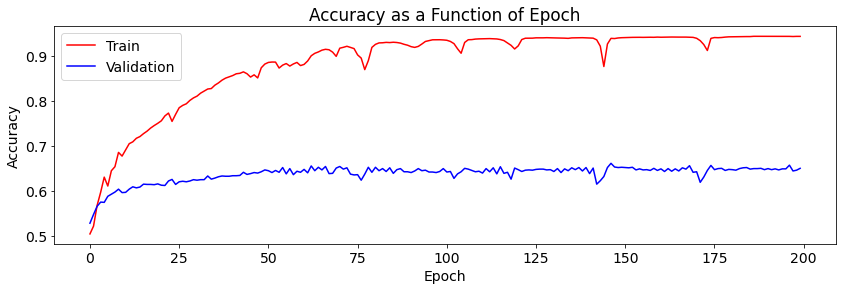

In [50]:
## Show the performance results for each of the neural network models that we build
plt.figure(figsize = (14, 4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Train')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

### Final validation accuracy

In [51]:
# Compute the final accuracy of the model on the validation data set using the 'evaluate()' method
performance_test = nn_best.evaluate(Tfidf_test, y_test)

print('The loss value of the model on the validation data is {}'.format(performance_test[0]))
print('The accuracy of the model on the validation data is {}'.format(performance_test[1]))

67/67 [==============================] - 0s 2ms/step - loss: 4.1297 - accuracy: 0.5040
The loss value of the model on the validation data is 4.129655838012695
The accuracy of the model on the validation data is 0.5039849877357483


## Results

- Document the results of both the conventional and the deep learning models here

- Which model would you finally choose?

## Closing Remarks

Congratulations! You have now reached the end of this assignment. With this, you are now well equipped with the skills to tackle advanced NLP problems that require DL applications as well. 

In fact, if you are felt that the performance of the basic neural network models left much to be desired, don't worry! In the upcoming weeks you'll learn some state of the art DL/NLP architectures such as transformers which perform significantly better and are responsible for some of the current advances in AI. We hope you have a great experience ahead!